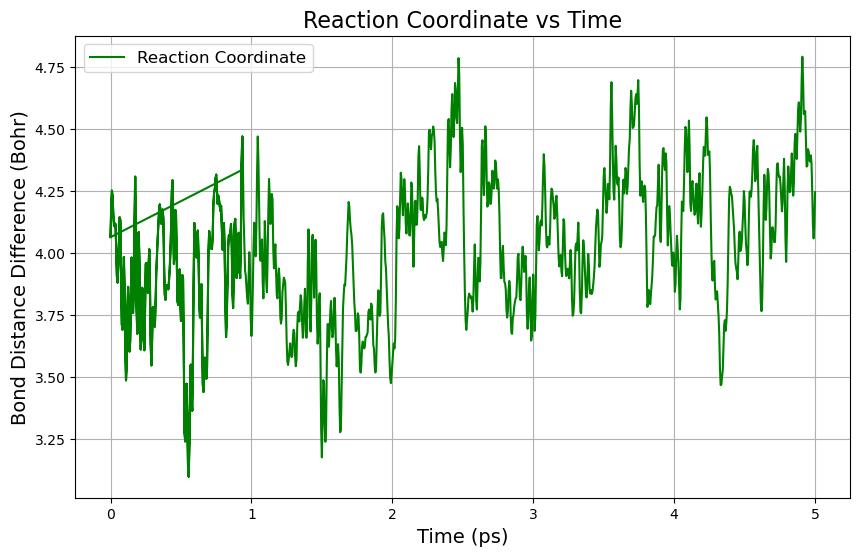

In [20]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# File paths
colvar_file = "../Outputs/monitor/MONITOR-COLVAR.metadynLog"
reaction_plot_file = "../Figures/reaction_coordinate_vs_time.png"

# Read the COLVAR data
def read_colvar(file_path):
    """Reads COLVAR data for the reaction coordinate."""
    time = []
    reaction_coord = []
    with open(file_path, 'r') as file:
        for line in file:
            # Ignore comments or headers
            if line.startswith("#"):
                continue
            data = line.split()
            time.append(float(data[0]))  # First column is time
            reaction_coord.append(float(data[1]))  # Second column is reaction coordinate
    return np.array(time), np.array(reaction_coord)

# Load the data
time, reaction_coord = read_colvar(colvar_file)

# Convert time to ps if necessary (assumes input in fs)
time_ps = time / 1000.0

# Plot the reaction coordinate
plt.figure(figsize=(10, 6))
plt.plot(time_ps, reaction_coord, label="Reaction Coordinate", color="green")

# Set labels and title
plt.title("Reaction Coordinate vs Time", fontsize=16)
plt.xlabel("Time (ps)", fontsize=14)
plt.ylabel("Bond Distance Difference (Bohr)", fontsize=14)  # difference in distance between the C-O bond that we will be breaking and the C-C bond that we will be forming
plt.legend(fontsize=12)
plt.grid()

# Save the figure
plt.savefig("../Figures/QMMM_BondDistance_vs_time.png", dpi=300)
plt.show()


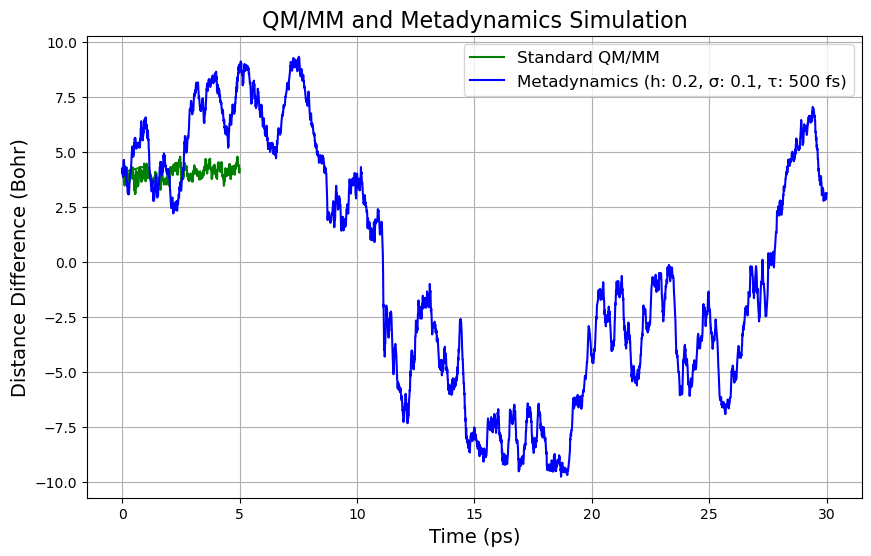

In [18]:
# File path for the new metadynamics data
metad1_file = "../Outputs/metad1_initmonitor/METADYN-COLVAR.metadynLog"

# Load the new COLVAR data
time_metad1, reaction_coord_metad1 = read_colvar(metad1_file)

# Plotting both datasets
plt.figure(figsize=(10, 6))

# Plot the standard QM/MM
plt.plot(time_ps, reaction_coord, label="Standard QM/MM", color="green")

# Plot the metadynamics simulation
plt.plot(time_metad1 / 1000, reaction_coord_metad1, label="Metadynamics (h: 0.2, σ: 0.1, τ: 500 fs)", color="blue")

# Add labels, title, and legend
plt.title("QM/MM and Metadynamics Simulation", fontsize=16)
plt.xlabel("Time (ps)", fontsize=14)
plt.ylabel("Distance Difference (Bohr)", fontsize=14)
plt.legend(fontsize=12)
plt.grid()

# Save the updated figure
plt.savefig("../Figures/QMMM_with_metadynamics.png", dpi=300)
plt.show()


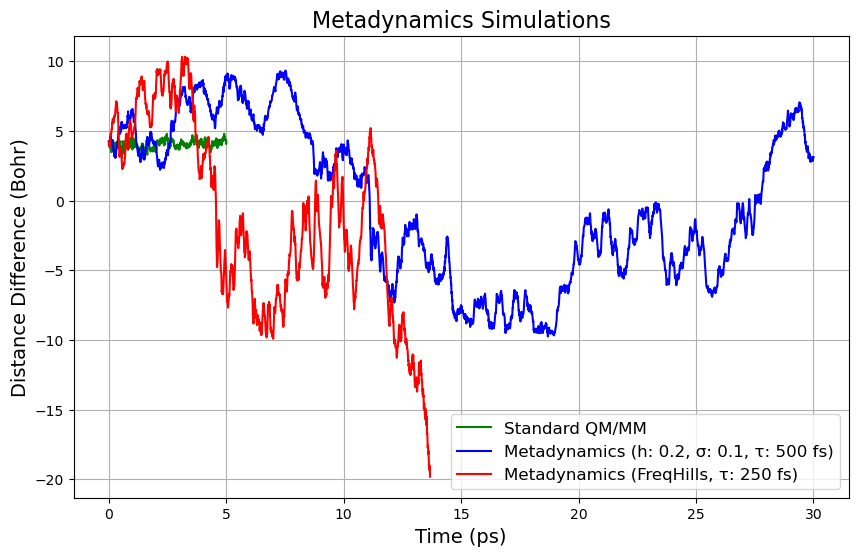

In [19]:
# File path for the frequency-hills simulation
metad1_freq_file = "../Outputs/metad1_initmonitor_freqhills/METADYN-COLVAR.metadynLog"

# Load the data
time_metad1_freq, reaction_coord_metad1_freq = read_colvar(metad1_freq_file)

# Plot all datasets
plt.figure(figsize=(10, 6))

# Plot each dataset
plt.plot(time_ps, reaction_coord, label="Standard QM/MM", color="green")
plt.plot(time_metad1 / 1000, reaction_coord_metad1, label="Metadynamics (h: 0.2, σ: 0.1, τ: 500 fs)", color="blue")
plt.plot(time_metad1_freq / 1000, reaction_coord_metad1_freq, label="Metadynamics (FreqHills, τ: 250 fs)", color="red")

# Add labels, title, and legend
plt.title("Metadynamics Simulations", fontsize=16)
plt.xlabel("Time (ps)", fontsize=14)
plt.ylabel("Distance Difference (Bohr)", fontsize=14)
plt.legend(fontsize=12)
plt.grid()

# Save the final figure
plt.savefig("../Figures/QMMM_metadynamics_with_frequency_hills.png", dpi=300)
plt.show()
